![consumer_behaviour.png](consumer_behaviour.png)

# DATA-DRIVEN INSIGHTS ON USER BEHAVIOR AND AD CLICKS
***
## BUSINESS UNDERSTANDING
***

### Business Overview
In the digital age, advertising is a critical component of customer engagement and conversion. However, not all ads perform equally well, and understanding what drives user engagement is key to optimizing ad campaigns. By analyzing user demographics, behavior, and ad characteristics, businesses can tailor their strategies to maximize click-through rates (CTR) and improve return on investment (ROI).

Online advertising is a colossal business worth more than [$50 billion](https://www.researchgate.net/publication/336666758_Machine_Learning_Based_Ad-click_prediction_system), with advertisers increasingly focusing on targeted ad strategies. As the industry grows, it becomes essential to continuously measure the effectiveness of ads and refine strategies accordingly. One of the key metrics for measuring ad performance is the ad click, which indicates how often users interact with online advertisements. A higher number of ad clicks typically signifies a stronger interest in the advertised product, service, or content, making it a valuable indicator of user engagement and potential conversion.

To stay ahead of the competition and optimize ad spending, businesses like Hubspot are leveraging advanced analytics to gain deeper insights into what drives ad engagement. Techniques like A/B testing allow businesses to experiment with different ad variations (e.g., copy, images, targeting) to determine which ones produce the best results. By testing multiple versions of ads with different audience segments, businesses can identify the most effective strategies and apply them at scale, thus improving engagement rates and maximizing ad spend efficiency.

Additionally, machine learning models can be implemented to predict user behavior based on historical ad interactions and demographic data, enabling businesses to target the right audience with the most relevant ads. This combination of A/B testing and machine learning can significantly enhance ad performance, providing data-driven strategies to refine advertising efforts over time.

### Problem Statement
Affiliate Marketing Company, Hubspot seeks to further invest significant resources in online advertising to drive user engagement, awareness, and conversions. However, the challenge often lies in determining which elements of an advertisement – such as content, targeting, timing, and format – are most effective in driving user interaction

### Main Objective:

To optimize ad performance by understanding the factors that drive user engagement.

#### Specific Objectives:

1. Demographic Impact     - Assess how demographic factors (e.g., age, gender, income) correlate with ad click-through rates.
2. Geographic Influence   - Analyze the geographic distribution of ad clicks to identify regions with higher engagement.
3. Peak Click Times       - Determine the optimal times of day and days of the week for ad delivery to maximize click-through rates.
4. User Behavior Patterns - Explore the relationship between user internet behavior and ad click propensity.
5. Ad Characteristics     - Examine how the ad topic line impacts the likelihood of users clicking on the ad. 

### Metrics of Success
1. Click Through Rate (CTR)
   
   - The primary metric for measuring user engagement with ads. A good CTR (above 5.70%) indicates effective ad targeting and content. Monitoring CTR helps optimize ad strategies for higher engagement.
  


2. Statistical Significance
   - Through hypothesis testing, we will determine the impact of various demographic, behavioral, and ad-related factors on CTR. Identifying statistically significant factors allows Hubspot to focus on the most influential variables for improving ad performance.

## DATA UNDERSTANDING
***

The dataset used in this project is sourced from [this link](https://statso.io/wp-content/uploads/2023/01/ctr.zip). 

It contains 10,000 rows and 10 columns, capturing various features related to user interactions with online advertisements. The dataset includes a mix of numerical, categorical, and datetime variables, which are essential for analyzing patterns and factors influencing ad clicks.

Below is a description of each feature in the dataset:

| **Feature Name**            | **Description**                                                 | **Type**           | **Examples**               |
|-----------------------------|---------------------------------------------------------------|--------------------|----------------------------|
| Daily Time Spent on Site    | Time spent by a user on the site daily (in minutes)           | Continuous Numeric | 68.95, 80.23               |
| Age                         | Age of the user                                               | Continuous Numeric | 35, 23                     |
| Area Income                 | Average income of the user's geographical area (in dollars)  | Continuous Numeric | 55000, 72000               |
| Daily Internet Usage        | Daily usage of the internet by the user (in minutes)         | Continuous Numeric | 120.5, 96.8                |
| Ad Topic Line               | Topic headline of the ad viewed                              | Categorical Text   | "Top Ad Offer", "Great Deal" |
| City                        | City where the user resides                                   | Categorical Text   | "New York", "San Francisco" |
| Gender                      | Gender of the user                                            | Categorical        | Male, Female               |
| Country                     | Country of the user                                           | Categorical Text   | "Qatar", "India"             |
| Timestamp                   | Date and time of the ad interaction                          | DateTime           | 2024-10-31 14:53:00        |
| Clicked on Ad               | Whether the user clicked on the ad (1 = Yes, 0 = No)         | Binary Categorical | 1, 0                       |



**Types of Variables:**

1. Continuous Numeric: These are numerical variables that can take on a wide range of values, such as age, daily time spent on site, and daily internet usage.

2. Categorical Text: These variables contain non-numeric data, often representing categories or labels, like the ad topic, city, and country.

3. Binary Categorical: This is a binary variable indicating whether the user clicked on the ad (1 = Yes, 0 = No).

4. DateTime: The timestamp reflects the exact time the user interacted with the ad, useful for understanding temporal patterns.

## DATA PREPARATION
***

The following steps in summary shall be followed in the data preparation stage in preparation for Modeling in later stages

 **1. Data Loading**      
- Load the Datasets  
- Inspect the Data

 **2. Data Cleaning**
- Consistency Check
- Completeness Check
- Validity Check
- Uniformity Check
  
 **3. Feature Engineering** 
 
 **4. Exploratory Data Analysis**
- Univariate Analysis    
- Bivariate Analysis


***
#### 1. DATA LOADING 
***
The following was carried out 
1. Loading the Datasets  
2. Inspecting the Data


In [7]:
import re
import time
import numpy as np
import pandas as pd
from classes import *
from scipy import stats
from collections import Counter
from geopy.geocoders import Nominatim
from pycountry_convert import country_name_to_country_alpha2, country_alpha2_to_continent_code

# Libraries for visualizations
import seaborn as sns
import plotly.express as px
from IPython.display import display, HTML
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
# Instantiate the DataLoader class
loader= DataLoader()

# Reading the csv file
data=loader.read_data("Clicked_On_AD.csv")

# Instantiate the DataInfo class
summary= DataInfo()

# Summary view of the dataset information
summary.info(data)

Shape of the dataset : (10000, 10) 

Column Names
Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object') 
 
Range of the Dataset (Timestamp)
Start Date: 2016-01-01 02:52:00
End Date:   2016-07-23 11:46:00


Numerical Columns
Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Clicked on Ad'],
      dtype='object')

Categorical Columns
Index(['Ad Topic Line', 'City', 'Gender', 'Country'], dtype='object')

Data Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  10000 non-null  float64       
 1   Age                       10000 non-null  int64         
 2   Area Income               10000 non-null  

Daily Time Spent on Site           Age   Area Income  \
count              10000.000000  10000.000000  10000.000000   
mean                  61.660757     35.940100  53840.047721   
min                   32.600000     19.000000  13996.500000   
25%                   48.860000     29.000000  44052.302500   
50%                   59.590000     35.000000  56180.930000   
75%                   76.580000     42.000000  61840.260000   
max                   90.970000     60.000000  79332.330000   
std                   15.704142      8.572973  13343.708718   

       Daily Internet Usage                      Timestamp  Clicked on Ad  
count          10000.000000                          10000   10000.000000  
mean             177.759831  2016-04-10 16:54:07.109999872       0.491700  
min              105.220000            2016-01-01 02:52:00       0.000000  
25%              140.150000            2016-02-26 01:18:00       0.000000  
50%              178.920000            2016-04-04 22:00:00       0.000000  
75%              212.670000            2016-06-02 21:02:00       1.000000  
max              269.960000            2016-07-23 11:46:00       1.000000  
std               40.820951                            NaN       0.499956

Dataset Overview


Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     62.26   32     69481.85                172.83   
1                     41.73   31     61840.26                207.17   
2                     44.40   30     57877.15                172.83   
3                     59.88   28     56180.93                207.17   
4                     49.21   30     54324.73                201.58   

                         Ad Topic Line             City  Gender  \
0      Decentralized real-time circuit         Lisafort    Male   
1       Optional full-range projection  West Angelabury    Male   
2  Total 5thgeneration standardization        Reyesfurt  Female   
3          Balanced empowering success      New Michael  Female   
4  Total 5thgeneration standardization     West Richard  Female   

                        Country           Timestamp  Clicked on Ad  
0  Svalbard & Jan Mayen Islands 2016-06-09 21:43:00              0  
1                     Singapore 2016-01-16 17:56:00              0  
2                    Guadeloupe 2016-06-29 10:50:00              0  
3                        Zambia 2016-06-21 14:32:00              0  
4                         Qatar 2016-07-21 10:54:00              1

***
#### 2. DATA CLEANING 
***

**2.1 Consistency Check**
***


Check for duplicates in the rows and drop any duplicated rows

In [10]:
# Instansitate the DataCheck class
data_checks = DataChecks(data)

# Checking for duplicates
data_checks.check_duplicates()

***********************************************
 Total Number of Dulpicated Rows 341
***********************************************


In [11]:
# Dropping the confirmed duplicates
data_checks.drop_duplicated()

# checking current shape of data
data.shape

(9785, 10)

**Observation**
***
- There are a total of 341 duplicated rows
- Upon confirmation of the duplicates these rows have been dropped to reduce noise
- Current dataframe has 9,785 rows and 10 columns

***
**2.2 Completeness Check**
***

Check for any missing values, or null values in the data set


In [14]:
# Checking for missing values by calling the check_missing method in the cleaning class
data_checks.check_missing()

NO NULL VALUES FOUND


**Observation**
***
- There are no missing values in the dataset


***
**2.3 Validity Check**
***
- Check for irrelevant data as well as outliers was carried out


***********************************************
Columns Containing Outliers Include: ['Age', 'Area Income']
***********************************************


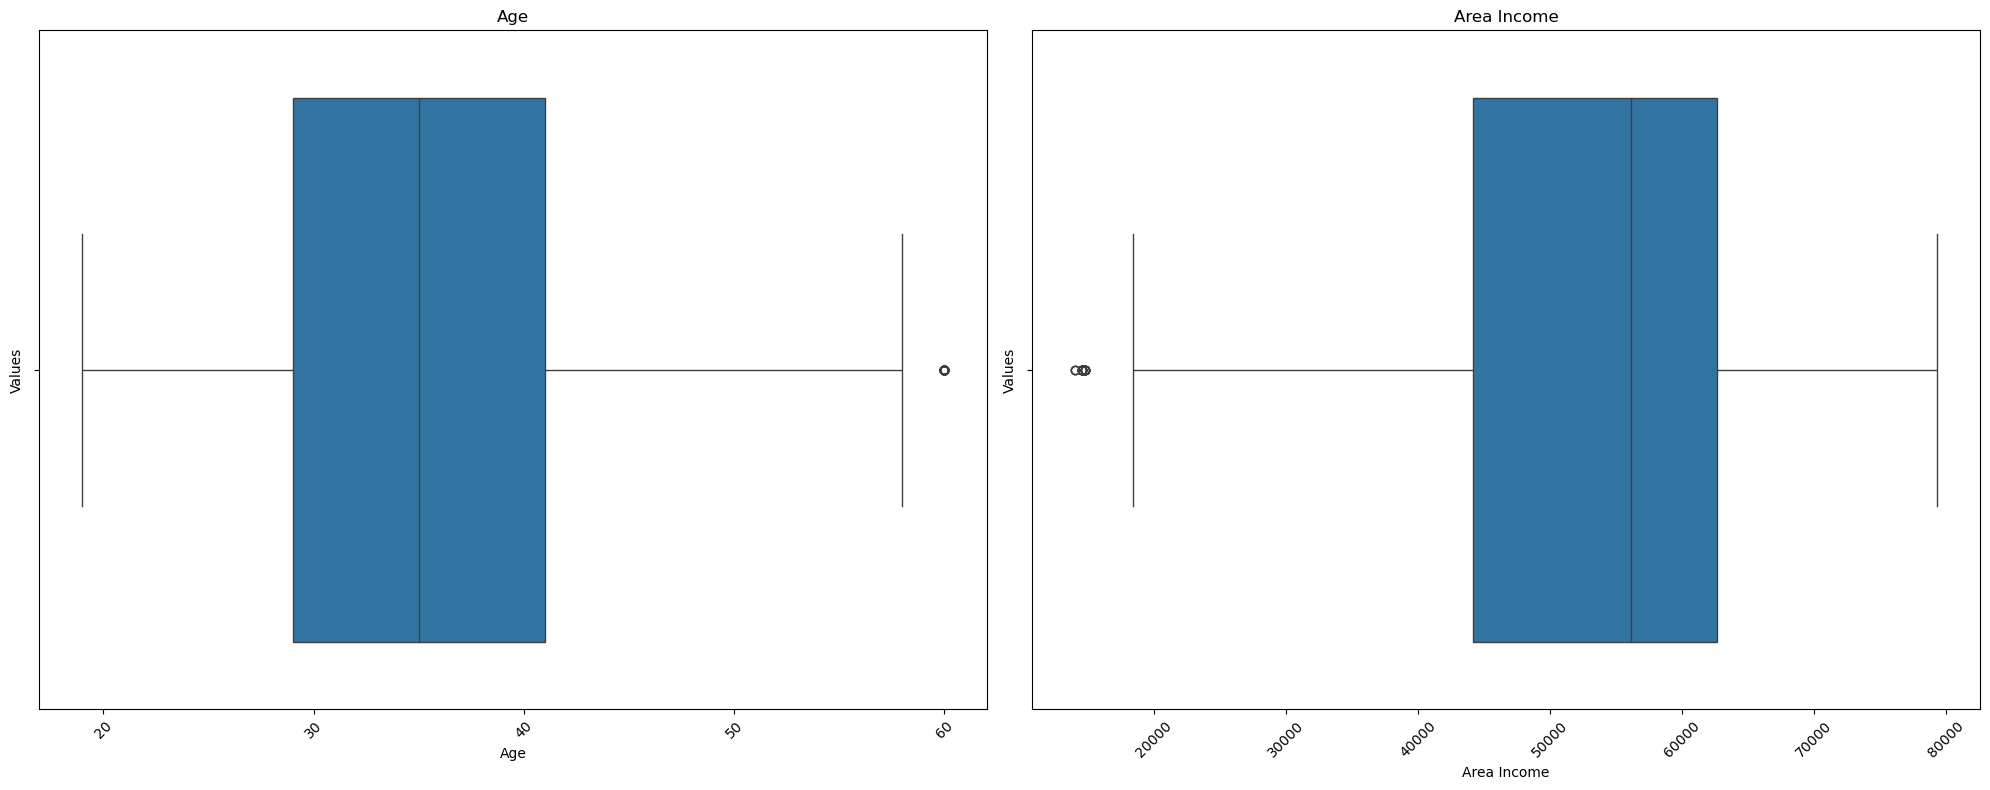

In [17]:
# Checking for outliers by calling the check_outliers_and_plot method in the cleaning class
data_checks.check_outliers_and_plot()

**Observation**
***
- The Area income is flagged as having outliers.
- However these outliers will not be dropped as it will give important information

In [19]:
# # Initialize the geolocator
# geolocator = Nominatim(user_agent="geo_validator")

# # Function to validate city-country pair
# def validate_city_country(city, country):
#     try:
#         location = geolocator.geocode(city)
#         if location and country.lower() in location.address.lower():
#             return True
#     except Exception as e:
#         print(f"Error validating {city}, {country}: {e}")
#     return False

# # Processing on the first 150 rows
 # for idx, row in data.head(150).iterrows():
#     city, country = row['City'], row['Country']
#     data.at[idx, 'Is_Valid'] = validate_city_country(city, country)

#     # Add a 1-second delay between requests
#     time.sleep(1)

#     # Print progress every 50 rows
#     if idx % 50 == 0:
#         print(f"Processed {idx + 1}/{len(data.head(150))} rows...")

# # Print the updated DataFrame
# print(" Value Counts of Valid City Names")
# print('-'*40)
# data.Is_Valid.value_counts()


In [20]:
# List of columns to drop
to_drop_list=["City"]

data.drop(columns=["City"], inplace= True)

**Observation**
***
- By using the geolocator and a sample size of 150, the city's in the city columns do not match with the country names.
- This column was hence dropped to avoid any confusion

***
**2.4 Unformity Check**
***

- Checks to ensure appropriate datatyping.
- Ensure all column names are uniform

In [23]:
# Columns to convert and their corresponding new data typings
convert_dict = {
                'Timestamp': 'datetime',
                'Clicked on Ad': 'object'
                }
# Calling the convert type method to convert the listed columns above
data = data_checks.convert_typing(convert_dict)
data.info()

Column 'Timestamp' has been successfully converted to datetime.
Column 'Clicked on Ad' has been successfully converted to object.
<class 'pandas.core.frame.DataFrame'>
Index: 9785 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  9785 non-null   float64       
 1   Age                       9785 non-null   int64         
 2   Area Income               9785 non-null   float64       
 3   Daily Internet Usage      9785 non-null   float64       
 4   Ad Topic Line             9785 non-null   object        
 5   Gender                    9785 non-null   object        
 6   Country                   9785 non-null   object        
 7   Timestamp                 9785 non-null   datetime64[ns]
 8   Clicked on Ad             9785 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 764.5+ KB


In [24]:
# Replace spaces with underscores in all column names
data.columns = data.columns.str.replace(' ', '_')

# Check the updated column names
print(data.columns)


Index(['Daily_Time_Spent_on_Site', 'Age', 'Area_Income',
       'Daily_Internet_Usage', 'Ad_Topic_Line', 'Gender', 'Country',
       'Timestamp', 'Clicked_on_Ad'],
      dtype='object')


**Observation**
***
- Timestamp dtype has been corrected
- All other columns have appropriate dtype
- All column names have been made uniform

In [26]:
data.head()

Daily_Time_Spent_on_Site  Age  Area_Income  Daily_Internet_Usage  \
0                     62.26   32     69481.85                172.83   
1                     41.73   31     61840.26                207.17   
2                     44.40   30     57877.15                172.83   
3                     59.88   28     56180.93                207.17   
4                     49.21   30     54324.73                201.58   

                         Ad_Topic_Line  Gender                       Country  \
0      Decentralized real-time circuit    Male  Svalbard & Jan Mayen Islands   
1       Optional full-range projection    Male                     Singapore   
2  Total 5thgeneration standardization  Female                    Guadeloupe   
3          Balanced empowering success  Female                        Zambia   
4  Total 5thgeneration standardization  Female                         Qatar   

            Timestamp Clicked_on_Ad  
0 2016-06-09 21:43:00             0  
1 2016-01-16 17:56:00             0  
2 2016-06-29 10:50:00             0  
3 2016-06-21 14:32:00             0  
4 2016-07-21 10:54:00             1

***
#### 3. FEATURE ENGINEERING
***
To better understand the demographic distribution that the marketings strategy was able to cover, some feature engineering needs to be carried as below

- Mapping of Regions and Islands that are not found in pycountry library
- Grouping these regions and Islands according to their Parent country
- Grouping these regions according to the continent they are found in

In [28]:
# #Visual view of all the Countries
# # Set pandas to display all rows (be cautious with large datasets)
# pd.set_option('display.max_rows', None)

# # Now, print the column
# print(data['Country'].value_counts())

# # Reset the display setting if needed
# pd.reset_option('display.max_rows')


In [29]:
# Define parent country mappings for islands and other regions
island_parent_mapping = {
    'Svalbard & Jan Mayen Islands': 'Norway',
    'Northern Mariana Islands': 'United States of America',
    'French Polynesia': 'France',
    'Pitcairn Islands': 'United Kingdom',
    'Bouvet Island (Bouvetoya)': 'Norway',
    'South Georgia and the South Sandwich Islands': 'United Kingdom',
    'Timor-Leste':'East Timor',
    'Palestinian Territory':'Palestine',
    'Libyan Arab Jamahiriya':"Libya",
    'Korea':"South Korea",
    "Cote d'Ivoire":"Ivory Coast",
    'United States Minor Outlying Islands': 'United States of America',
    'Netherlands Antilles':'Netherlands',
    'French Southern Territories':'France',
    'Saint Helena':'United Kingdom',
    'Saint Barthelemy':'France',
    'Reunion':'France'
}

# Define continent codes
continent_map = {
    'AF': 'Africa',
    'AS': 'Asia',
    'EU': 'Europe',
    'NA': 'North America',
    'SA': 'South America',
    'OC': 'Oceania',
    'AN': 'Antarctica'
}

# Define custom mappings for regions and islands
custom_mappings = {
    'Svalbard & Jan Mayen Islands': 'Europe',
    'Northern Mariana Islands': 'Oceania',
    'Western Sahara': 'Africa',
    'French Polynesia': 'Oceania',
    'Pitcairn Islands': 'Oceania',
    'South Georgia and the South Sandwich Islands': 'Antarctica',
    'Bouvet Island (Bouvetoya)': 'Antarctica',
    'Timor-Leste':'Asia',
    'Palestinian Territory':'Asia',
    'Libyan Arab Jamahiriya':"Africa",
    'Korea':"Asia",
    "Cote d'Ivoire": "Africa",
    'United States Minor Outlying Islands': 'North America',
    'Netherlands Antilles':'North America',
    'French Southern Territories':'Antarctica',
    'Saint Helena':'Africa',
    'Saint Barthelemy':'North America',
    'Reunion':'Africa'
}


In [30]:
# Function to map country to continent
def get_continent(country_name):
    try:
        # Get the ISO alpha-2 code for the country
        country_code = country_name_to_country_alpha2(country_name)
        # Get the continent code for the country code
        continent_code = country_alpha2_to_continent_code(country_code)
        # Map the continent code to its name
        return continent_map[continent_code]
    except Exception:
        return 'Unknown'

# Function to apply custom mappings
def map_custom_country(country_name):
    return custom_mappings.get(country_name, get_continent(country_name))

# Function to map islands to their parent countries
def get_parent_country(country_name):
    return island_parent_mapping.get(country_name, country_name)

# Add continent and parent country columns
data['Continent'] = data['Country'].apply(map_custom_country)
data['Parent_Country'] = data['Country'].apply(get_parent_country)

# Validate and visualize results
print("Unmapped Regions:", data[data['Continent'] == 'Unknown']['Country'].unique())
data.head()

Unmapped Regions: []


Daily_Time_Spent_on_Site  Age  Area_Income  Daily_Internet_Usage  \
0                     62.26   32     69481.85                172.83   
1                     41.73   31     61840.26                207.17   
2                     44.40   30     57877.15                172.83   
3                     59.88   28     56180.93                207.17   
4                     49.21   30     54324.73                201.58   

                         Ad_Topic_Line  Gender                       Country  \
0      Decentralized real-time circuit    Male  Svalbard & Jan Mayen Islands   
1       Optional full-range projection    Male                     Singapore   
2  Total 5thgeneration standardization  Female                    Guadeloupe   
3          Balanced empowering success  Female                        Zambia   
4  Total 5thgeneration standardization  Female                         Qatar   

            Timestamp Clicked_on_Ad      Continent Parent_Country  
0 2016-06-09 21:43:00             0         Europe         Norway  
1 2016-01-16 17:56:00             0           Asia      Singapore  
2 2016-06-29 10:50:00             0  North America     Guadeloupe  
3 2016-06-21 14:32:00             0         Africa         Zambia  
4 2016-07-21 10:54:00             1           Asia          Qatar

**Observation**
***
- Multiple regions and islands have been correctly mapped
- Some regions such as Guadalope still retains their name as Parent country name despite being a territory
- Dataset contains 9785 rows and 11 columns now
  

***
#### 4. EXPLORATORY DATA ANALYSIS

***

**4.1 Univariate Analysis**
***

This section examines the distribution of key features in the dataset:

1. Demographic Variables: Distribution of age and gender.
2. Geographic Variables: Distribution of data across continents and countries.
3. User Behavior: Analysis of Clicked_on_Ad responses.
4. Continuous Features: Distribution of Daily_Time_Spent_on_Site, Area_Income, and Daily_Internet_Usage.
5. Ad Topic Line Analysis: Frequency distribution of words in the "Ad_Topic_Line" to identify the most commonly used terms.

***
**4.1.1. Demographic Variables**
***


Mean  Max  Min
Column                    
Age     35.83955   60   19

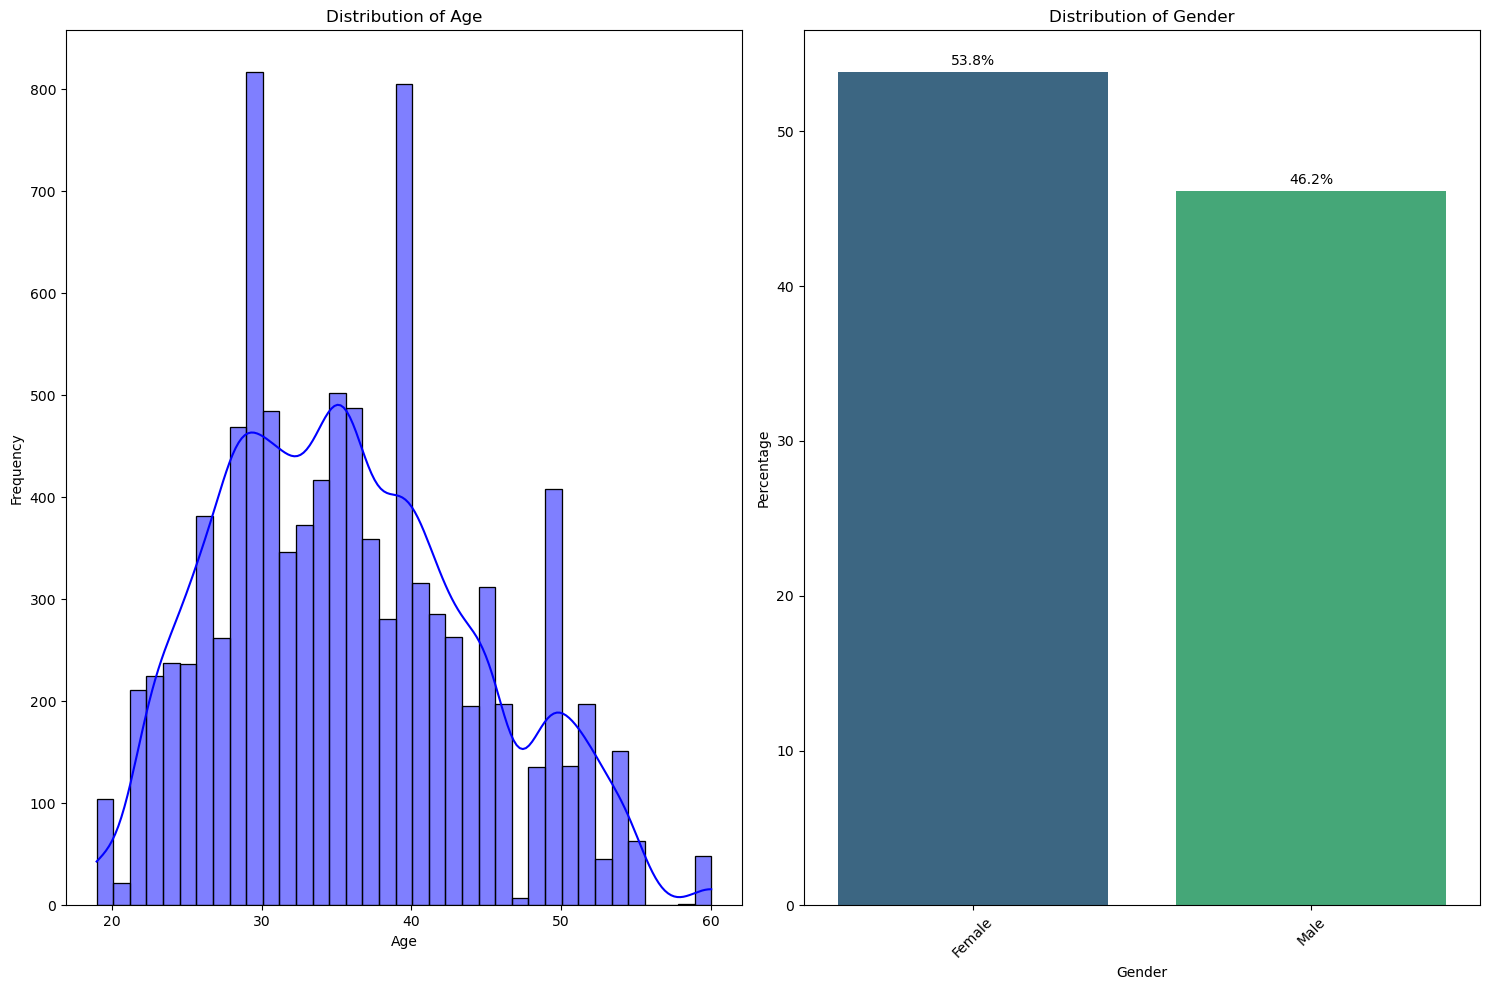

In [33]:
# Instantiating the EDA class
EDA= EDA(data)

# Demographic Information
listed=["Age", "Gender"]

# Plotting to understand demographic information
EDA.plot_univariate_distribution(listed)

**Observation**
***
- The average age of the population that viewed the ad was 35.8 years, with the youngest at 19 and oldest at 60
- The majority of the viewers are female at 53.8%

***
**4.1.2. Geographic Variables**
***

Empty DataFrame
Columns: [Mean, Max, Min]
Index: []

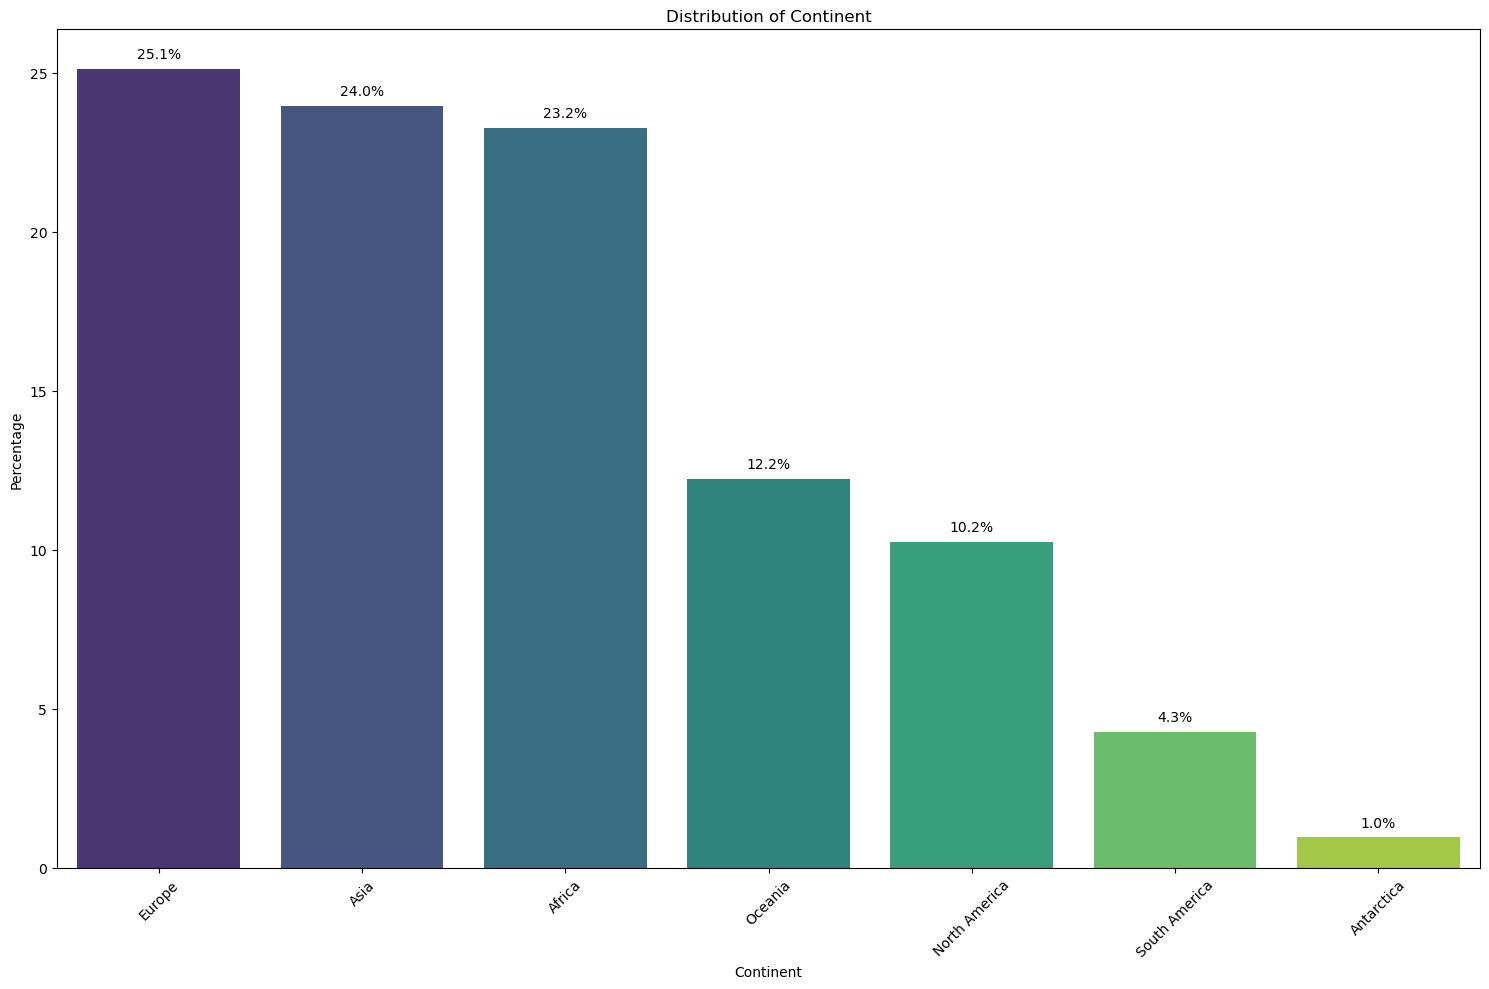

In [35]:
# Regional Information
listed = ['Continent']

# Plotting to understand regional distribution
EDA.plot_univariate_distribution(listed)


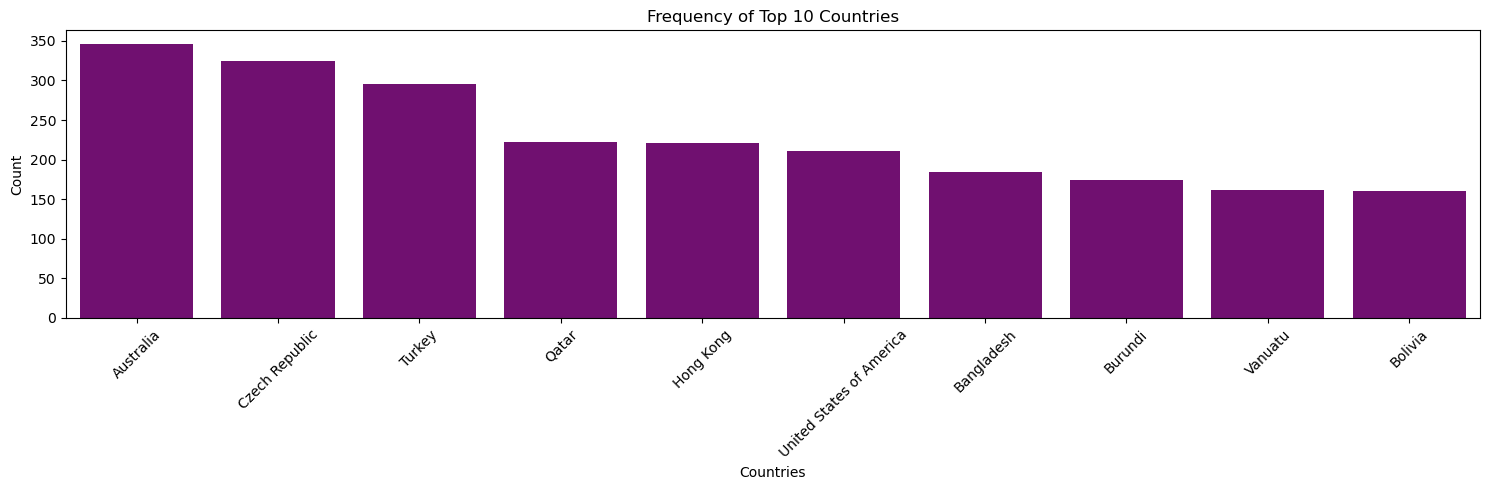

In [36]:
# Filtering to get the top 10 coutries that were exposed to the Ad
top_10_countries= data["Parent_Country"].value_counts().sort_values(ascending=False)[:10]

plt.figure(figsize=(15,5))

# Create a barplot for the top 10 countries
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, color='purple')

# Set the title and labels
plt.title("Frequency of Top 10 Countries")
plt.xlabel("Countries")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


**Observation**
***
- The AD coverage was mainly in Europe, Asia and Africa
- The top 3 countries that viewed the AD were  Australia, Czech Republic  and Turkey

***
**4.1.3. User Behavior**
***

Empty DataFrame
Columns: [Mean, Max, Min]
Index: []

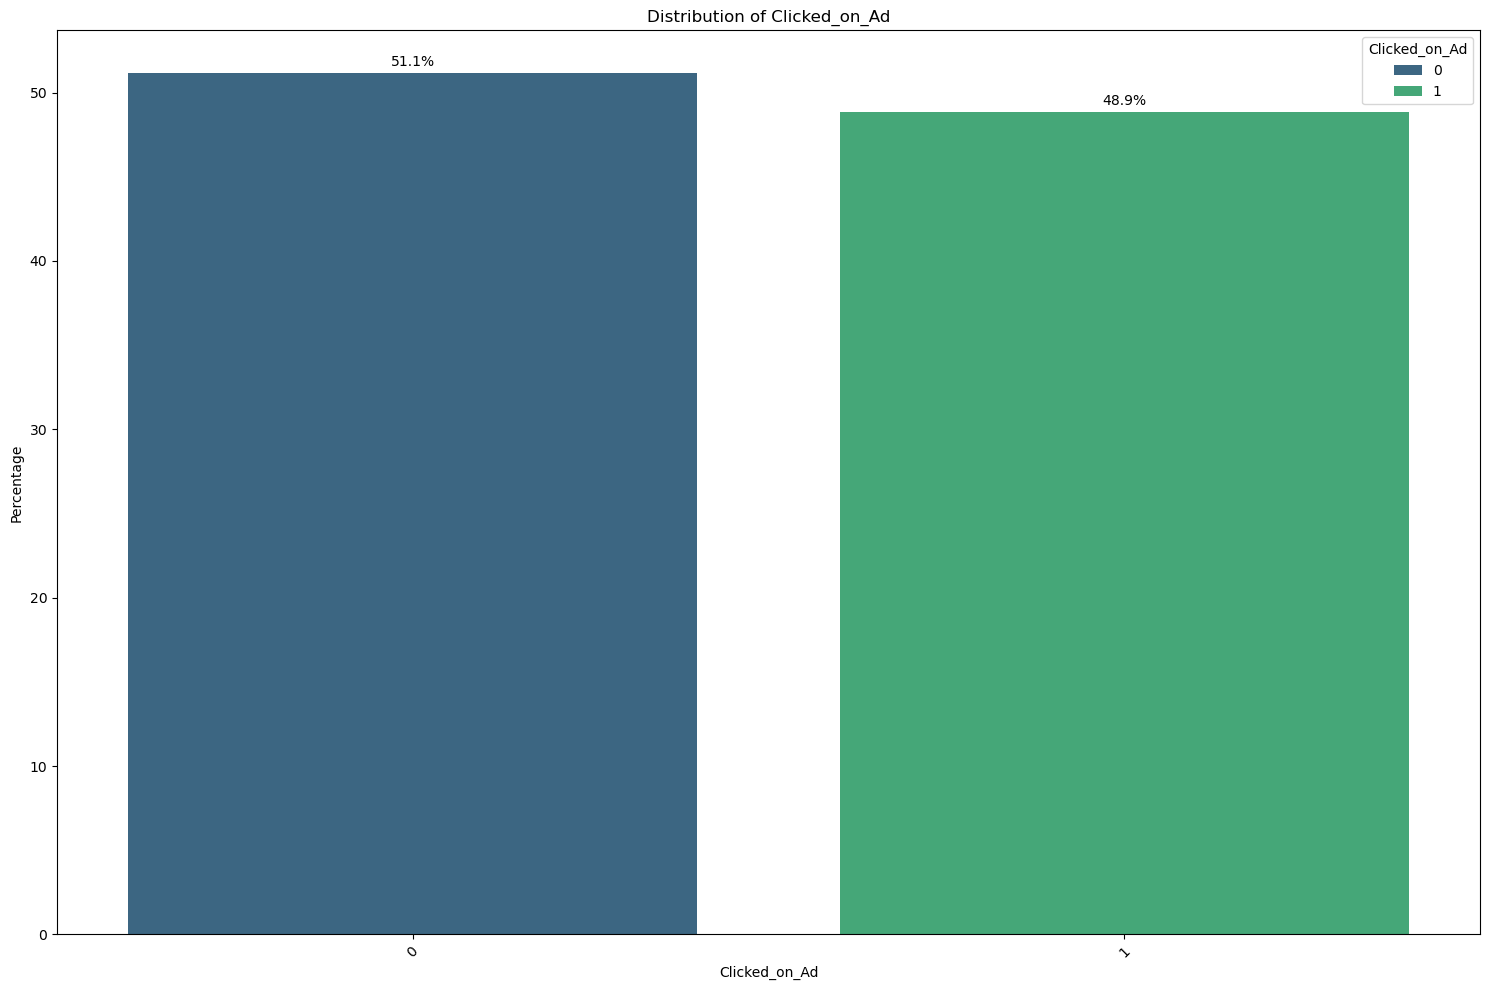

In [38]:
# Plotting to understand the frequency of those who clicked on the AD(1) and those who did not (0)
listed = ['Clicked_on_Ad']

EDA.plot_univariate_distribution(listed)


**Observation**
***
- The number of people who clicked and did not click on the Ad are almost even at 51.1% who did not click and 48.9% who clicked.
- From this we can see the Click Through Rate(CTR) is 48.9%

***
**4.1.4. Continuous Features**
***

Mean       Max       Min
Column                                                    
Daily_Time_Spent_on_Site     61.601379     90.97     32.60
Daily_Internet_Usage        177.886144    269.96    105.22
Area_Income               53948.143348  79332.33  13996.50

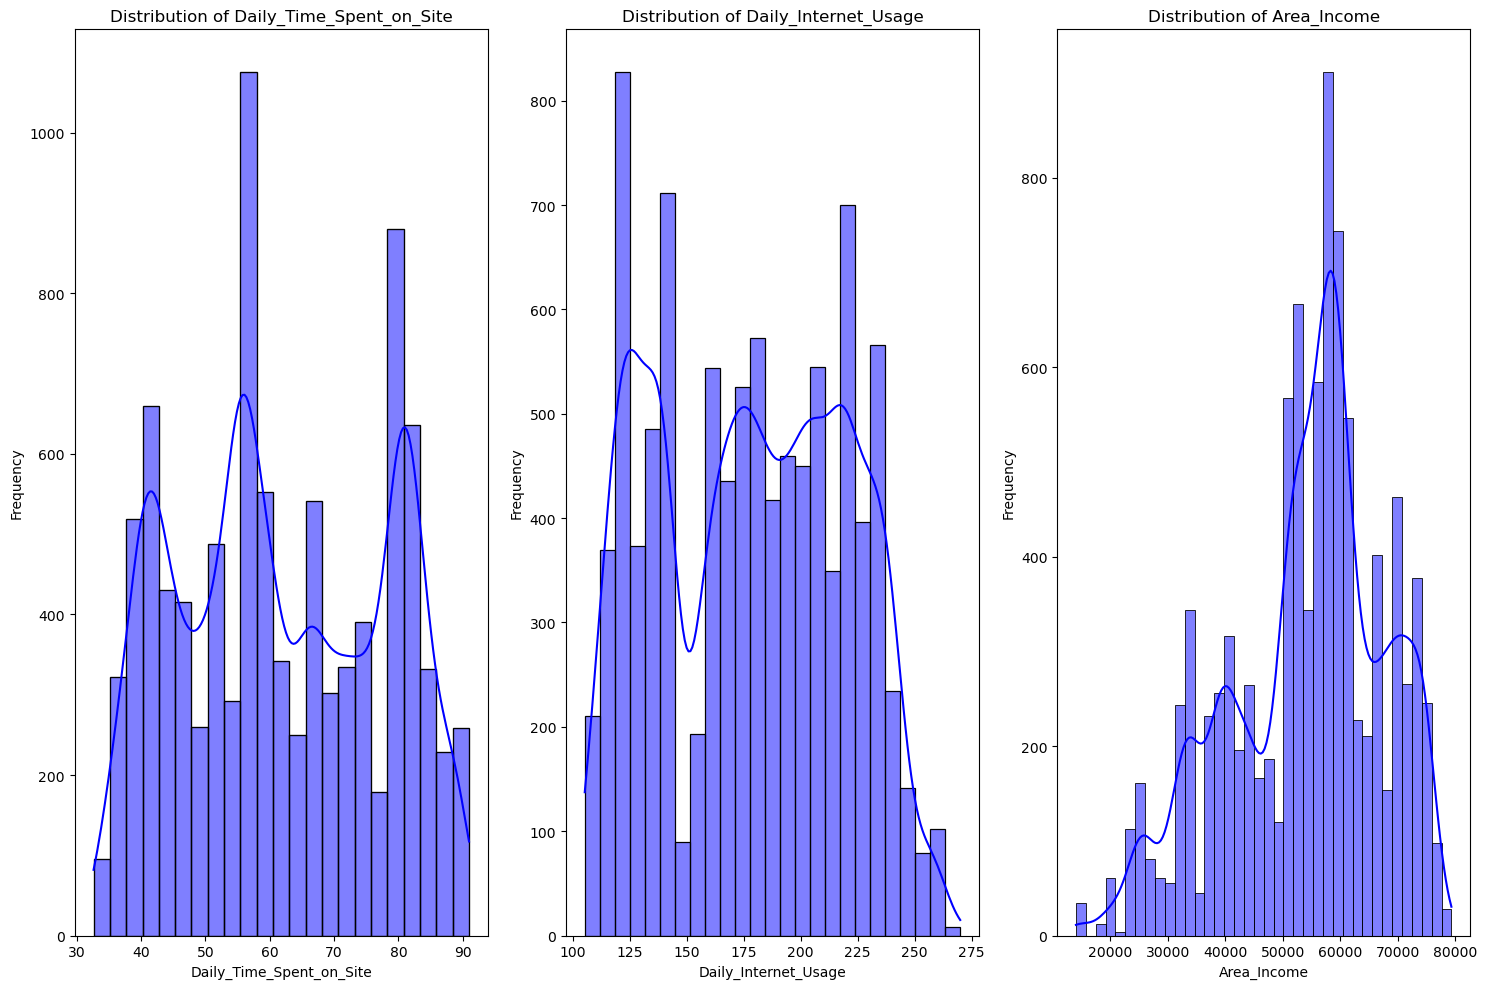

In [40]:
# List of distribution of income and internet usage
listed=['Daily_Time_Spent_on_Site','Daily_Internet_Usage','Area_Income']

# Calling the function to plot
EDA.plot_univariate_distribution(listed)

**Observation**
***

- Average Internet Usage for the population is 177 minutes
- Average time spent on the website is 61 minutes. Should explore to see correlation between this and clicking on the AD
- Average area income is 53,948 which shows a higher average than the [global average income](https://www.zippia.com/advice/average-income-worldwide/#:~:text=Today%2C%20the%20average%20global%20income,it's%20a%20huge%20relative%20increase.)

***
**4.1.5. Ad Topic Line Analysis**
***

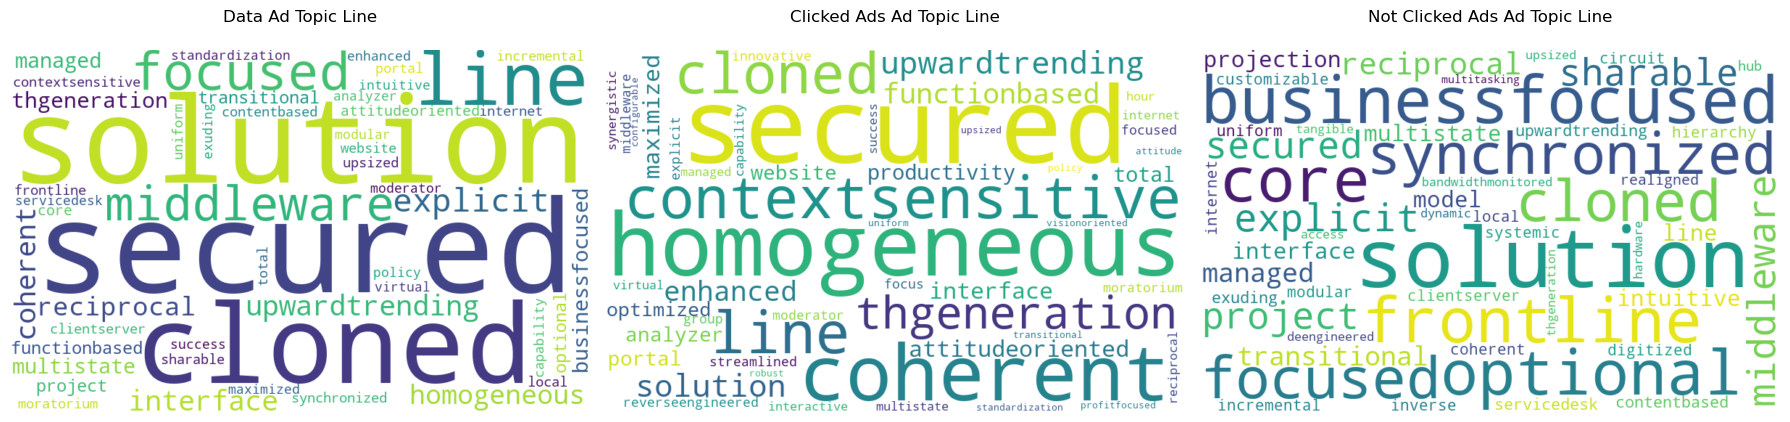

In [42]:
# filtering to get ads that were clicked and those that weren't
clicked_ads=data[data['Clicked_on_Ad']==1]
not_clicked_ads=data[data['Clicked_on_Ad']==0]

# From the EDA, calling the word_cloud method to create the word clouds
wc_data = EDA.word_cloud(data, 'Ad_Topic_Line')
wc_clicked = EDA.word_cloud(clicked_ads, 'Ad_Topic_Line')
wc_not_clicked = EDA.word_cloud(not_clicked_ads, 'Ad_Topic_Line')

# Plotting them side by side
plt.figure(figsize=(18,6))

# Subplot for data word cloud
plt.subplot(1, 3, 1)
plt.imshow(wc_data, interpolation='bilinear')
plt.axis('off')
plt.title('Data Ad Topic Line', pad=20)

# Subplot for clicked ads word cloud
plt.subplot(1, 3, 2)
plt.imshow(wc_clicked, interpolation='bilinear')
plt.axis('off')
plt.title('Clicked Ads Ad Topic Line', pad=20)


# Subplot for not clicked ads word cloud
plt.subplot(1, 3, 3)
plt.imshow(wc_not_clicked, interpolation='bilinear')
plt.axis('off')
plt.title('Not Clicked Ads Ad Topic Line', pad=20)

# Show the plot
plt.tight_layout()
plt.show()


**Observation**
***
- The most common words in all the ads shown are solution, secured, cloned, focused and line.
- However, the most common words found in clicked Ads are secured, homogeneous, coherent and cloned.
- The most common words in Ads that were not clicked were solution, business, focused,frontline and synchronized.
  
***
**4.2 Bivariate Analysis**
***

In this section, we will analyze the relationship between various features and the Clicked_on_Ad column.

**1. Multicollinearity Check** – Investigating the correlation between numerical columns to identify potential multicollinearity.

**2. Clicked_on_Ad vs. Categorical Columns** – Exploring how Clicked_on_Ad interacts with categorical variables.

**3. Clicked_on_Ad vs. Numerical Columns** – Analyzing the relationship between Clicked_on_Ad and numerical variables.

**4. Peak Ad Click Through Rate Periods** - Analyzing the relationship between day and the time of day that ads are clicked

***
**4.2.1 Multicollinearity Check**
***

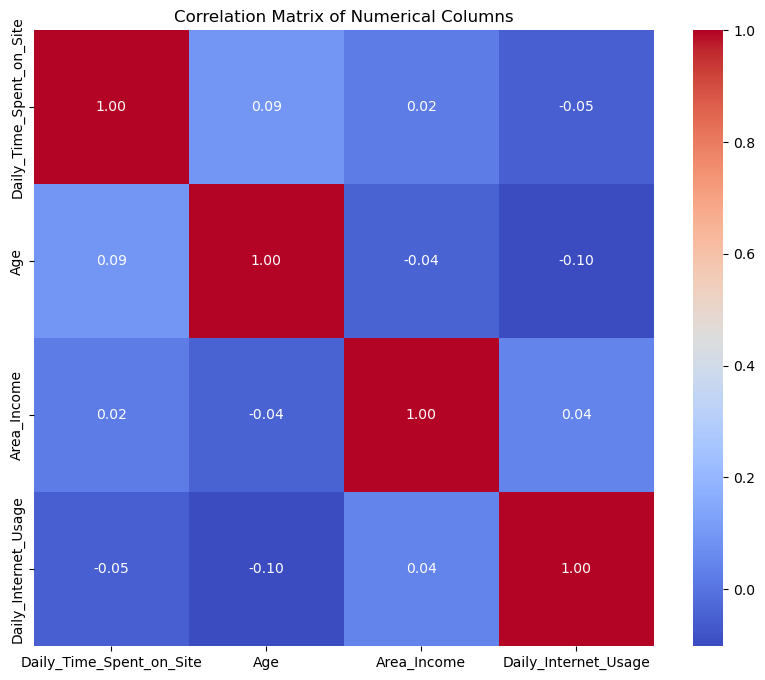

In [45]:
# Selecting the numerical columns to plot
numerical_df = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

**Observation**
***
- There is no multicoliniarity present in the numerical columns
- The columns show independence from each from each other.


***
**4.2.2. Clicked_on_Ad vs. Categorical Columns**
***

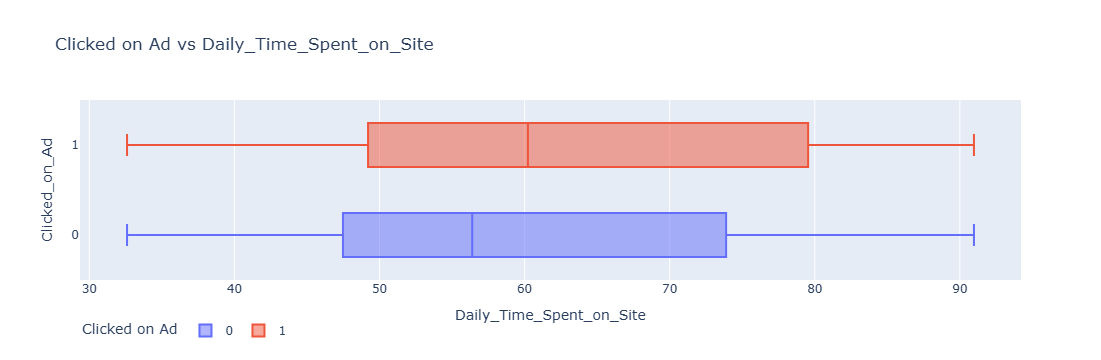

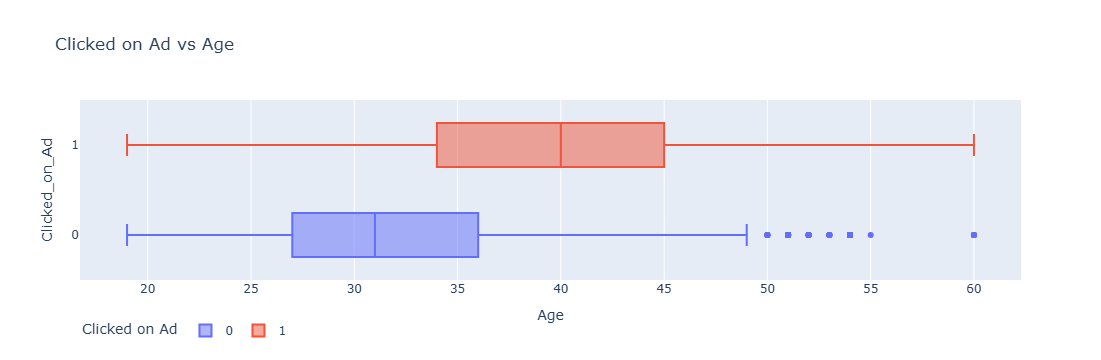

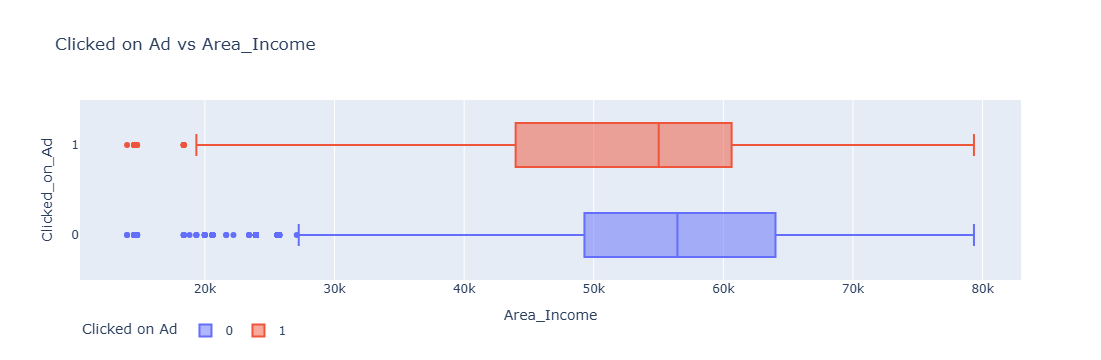

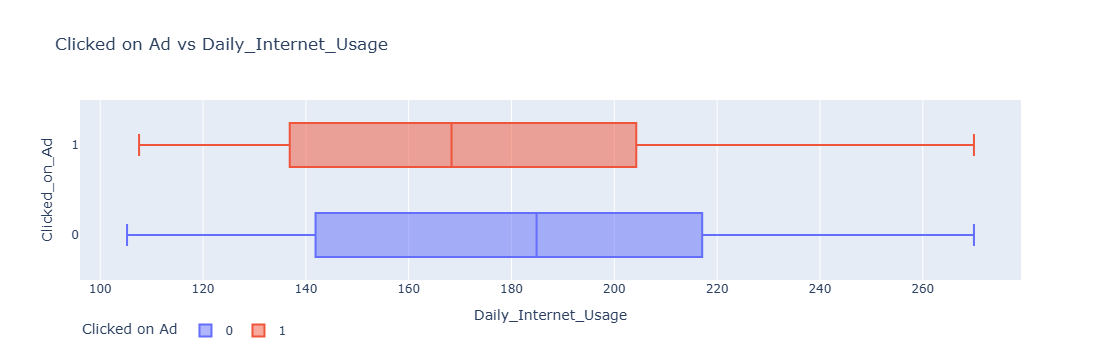

In [47]:
# List of columns to plot i.e. numerical columns only
x_list=numerical_df

# calling the function to plot numerical columns as box plots
EDA.plot_y_vs_numerical_columns(x_list)

**Observation**
***
- The more time someone spent on the site, the higher the chances of them clicking on the AD
- The older the person is, the more likely they are to click on the AD
- The less time spent on daily internet usage, more likely they are to click on the AD
- Population with lower Area Income were also more likely to click on it.
  
***
**4.2.3. Clicked_on_Ad vs. Numerical Columns**
***

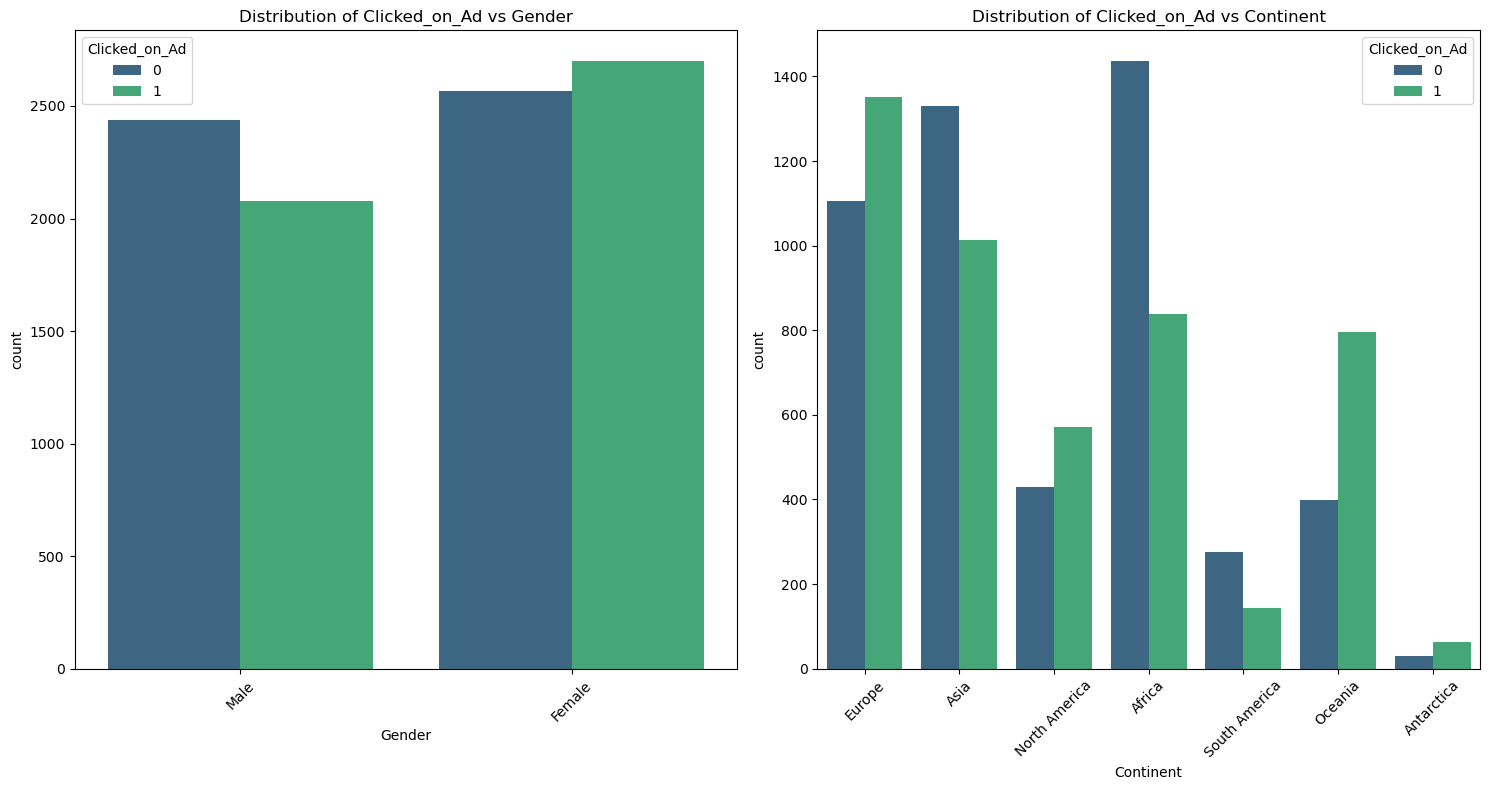

In [49]:
# List of categorical columns to compare with 'Clicked_on_Ad'
x_list = ['Gender', 'Continent']

# Calling the function to plot the cat columns
EDA.plot_categorical_columns_vs_Clicked_Ads( x_list)


**Observation**
***
- Women in general were more likely to click on the AD at a higher rate than men
- The continents of Europe, Oceania and North America had a higher percentage of clicked Ads as compared to those who did not click
- Africa and Asia had significant percentages that did not click on the Ad.

***
**4.2.4. Peak Ad Click Through Rate Periods**
***

********************************************************************************
PEAK DAY WAS AT WEDNESDAY WITH A CLICK THROUGH RATE OF 0.5909090909090909
PEAK DAY WAS AT FRIDAY WITH A CLICK THROUGH RATE OF 0.3847376788553259
********************************************************************************




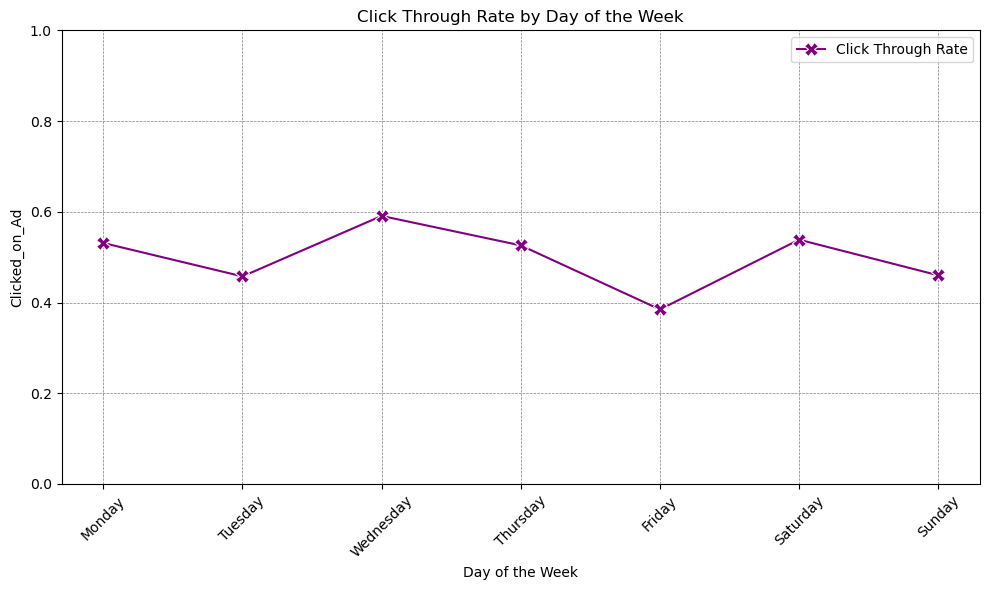

********************************************************************************
PEAK HOUR WAS AT 12:00 WITH A CLICK THROUGH RATE OF 0.7070063694267515
PEAK HOUR WAS AT 00:00 WITH A CLICK THROUGH RATE OF 0.26651480637813213
********************************************************************************




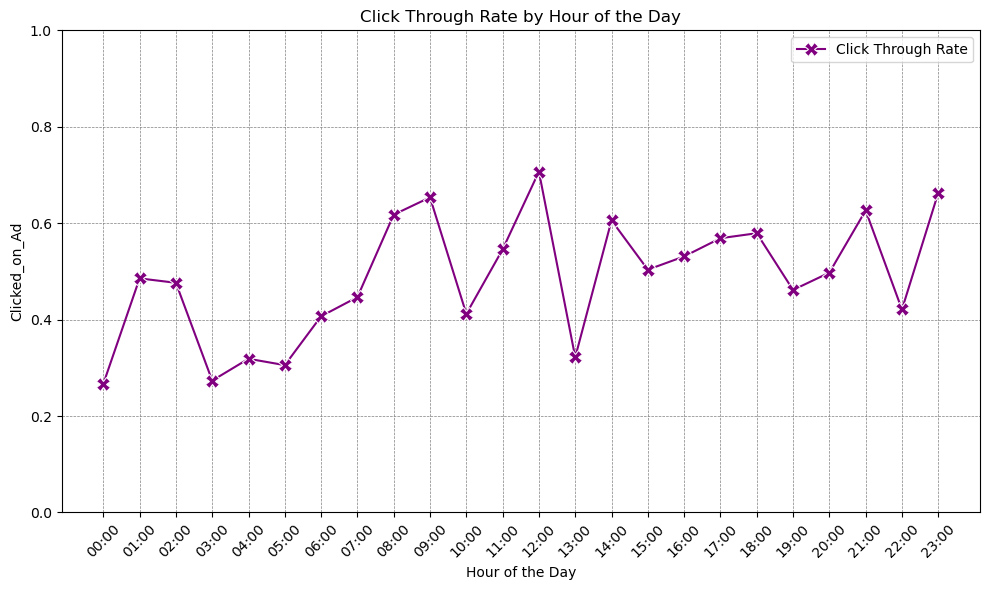

In [51]:
# Convert Timestamp to 'Hour' in 24-hour format
data['Hour'] = pd.to_datetime(data['Timestamp']).dt.strftime('%H:00')

# Convert Timestamp to 'Day' (Weekday name)
data['Day'] = pd.to_datetime(data['Timestamp']).dt.strftime('%A')  # Full name of day

# Make 'Hour' a categorical column with ordered categories
ordered_hours = [f"{i:02d}:00" for i in range(24)]
data['Hour'] = pd.Categorical(data['Hour'], categories=ordered_hours, ordered=True)

# Make 'Day' a categorical column with ordered days (Monday to Sunday)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['Day'] = pd.Categorical(data['Day'], categories=ordered_days, ordered=True)

# Call the function with 'Day' column
EDA.peak_period_for_ads_clicked('Day')

# Call the function with 'Hour' column
EDA.peak_period_for_ads_clicked('Hour')




**Observation**
***

- Wednesday was the day with the best click through rate at average of 0.6
- Friday showed the lowest CTR of 0.38
- The time of day with the highest CTR was at 12:00 with a CTR of 0.70.
- While the time of day with the lowest CTR was at midnight with a CTR of 0.26
  

## HYPOTHESIS TESTING
***


From this data, we can further find the statistical significance of features related to the clicked_on_Ads column or the CTR.
The hypotheses we will test are based on the objectives described above. 

1. Demographic Impact: Assess how demographic factors (i.e., age, gender, area income) correlate with ad click-through rates.
2. Geographic Influence: Analyze the geographic distribution of ad clicks to identify regions with higher engagement.
3. Peak Click Times: Determine the optimal times of day and days of the week for ad delivery to maximize click-through rates.
4. User Behavior Patterns: Explore the relationship between user internet behavior (i.e., daily internet usage, daily time spent on site) and ad click propensity.
5. Ad Characteristics: Examine how  the ad topic line impacts the likelihood of users clicking on the ad. 

**1. Demographic Impact**
   
1.1 Age and Ad Clicks

- Null Hypothesis (H₀): There is no difference in ad click rates between different age groups.

- Alternative Hypothesis (H₁): There is a significant difference in ad click rates between different age groups.

1.2 Gender and Ad Clicks

- Null Hypothesis (H₀): There is no difference in the ad click rate between males and females.

- Alternative Hypothesis (H₁): There is a significant difference in the ad click rate between males and females.

1.3 Area Income and Ad Clicks

- Null Hypothesis (H₀): There is no relationship between area income (Area_Income) and the likelihood of clicking on an ad.

- Alternative Hypothesis (H₁): There is a significant relationship between area income and the likelihood of clicking on an ad.


**2. Geographic Influence**

2.1 Country and Ad Clicks

- Null Hypothesis (H₀): The country of the user does not affect the likelihood of clicking on an ad.

- Alternative Hypothesis (H₁): The country of the user significantly affects the likelihood of clicking on an ad.

2.2 Continent and Ad Clicks

- Null Hypothesis (H₀): The continent does not influence the likelihood of clicking on an ad.

- Alternative Hypothesis (H₁): The continent influences the likelihood of clicking on an ad.

**3. Peak Click Times**

3.1 Day of the Week and Ad Clicks

- Null Hypothesis (H₀): The ad click rate is the same across all days of the week.

- Alternative Hypothesis (H₁): The ad click rate differs across different days of the week.

3.2 Time of the Day and Ad Clicks

- Null Hypothesis (H₀): The ad click rate is the same across all hours of the day.

- Alternative Hypothesis (H₁): The ad click rate differs across different hours of the day.

**4. User Behavior**

4.1 Daily Internet Usage and Ad Clicks

- Null Hypothesis (H₀): There is no relationship between daily internet usage and the ad click rate.

- Alternative Hypothesis (H₁): There is a relationship between daily internet usage and the ad click rate.

4.2 Daily Time Spent on Site and Ad Clicks

- Null Hypothesis (H₀): There is no relationship between the daily time spent on the site and the ad click rate.

- Alternative Hypothesis (H₁): There is a relationship between the daily time spent on the site and the ad click rate.

**5. Ad Characteristics**

5.1 Ad Topic Line and Ad Click

- Null Hypothesis (H₀): The specific content of the ad topic line does not significantly affect the likelihood of clicking on the ad.
 
- Alternative Hypothesis (H₁): The specific content of the ad topic line significantly affects the likelihood of clicking on the ad.

**Summary**
***

To mitigate the risk of Type I errors arising from multiple hypothesis testing, a Bonferroni correction was applied. With 10 hypotheses under consideration, the significance level was adjusted to 0.005 (0.05/10) to maintain an overall Type I error rate of 5%.

In [54]:
# Initializing the hypothesis testing class
hypothesis_tester = HypothesisTesting(data)

# Running all hypothesis tests
hypothesis_tester.test_age_vs_ad_clicks()
hypothesis_tester.test_gender_vs_ad_clicks()
hypothesis_tester.test_area_income_vs_ad_clicks()
hypothesis_tester.test_country_vs_ad_clicks()
hypothesis_tester.test_continent_vs_ad_clicks()
hypothesis_tester.test_day_of_week_vs_ad_clicks()
hypothesis_tester.test_time_of_day_vs_ad_clicks()
hypothesis_tester.test_daily_internet_usage_vs_ad_clicks()
hypothesis_tester.test_daily_time_spent_vs_ad_clicks()
hypothesis_tester.test_ad_topic_line_vs_ad_clicks()

# Get the results in a DataFrame
results_df = hypothesis_tester.get_results()
display(HTML(results_df.to_html()))


C:\Users\user\Desktop\PROJECTS\Data-Driven-Insights-on-User-Behavior-and-Ad-Clicks\classes.py:434: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



***
## CONCLUSIONS
***
**CLICK THROUGH RATE (CTR)**
***

The interpretation of the click-through rate (CTR) depends on various factors, including the industry, target audience, and advertising goals. From the data, we can conclude that the Ads garnered a good CTR for the period in which the Ads ran on Hubspots site. A CTR of 49.17 is significantly higher than the industry standard of 5.7%. [DataWrapper](https://cxl.com/guides/click-through-rate/benchmarks/#:~:text=If%20you're%20wondering%20what,least%2C%20higher%20than%20average)

***
**HYPOTHESIS TESTING**
***
**1. Age vs. Ad Clicks:**

- A statistically significant positive relationship exists between Age and Ad Clicks. As age increases, the likelihood of ad clicks tends to increase as well.

**2. Gender vs. Ad Clicks:**
 
- There is a significant relationship between Gender and Ad Clicks. The distribution of ad clicks varies significantly across different gender categories with women having a higher click rate.

**3. Area Income vs. Ad Clicks:**

- Area Income has a weak but statistically significant negative correlation with Ad Clicks. Higher income areas tend to have slightly lower ad click rates.

**4. Country vs. Ad Clicks:**

- The Country variable significantly affects ad clicks. The distribution of clicks is highly dependent on the country of the users.

**5. Continent vs. Ad Clicks:**

- There is a strong statistical significance between Continent and Ad Clicks, indicating that users from different continents i.e. Europe, Asia and Oceania have notably different ad click behaviors.

**6. Day of Week vs. Ad Clicks:**

- Ad Click Rate differs significantly across the days of the week. With wednesday, Saturday and Monday experiencing higher ad engagement than others.

**7. Time of Day vs. Ad Clicks:**

- Time of Day significantly affects the ad click rate, suggesting that users are more likely to engage with ads at 9am, 12pm and 11pm.

**8. Daily Internet Usage vs. Ad Clicks:**

- There is a significant negative correlation between Daily Internet Usage and Ad Clicks. As internet usage increases, the likelihood of clicking ads decreases slightly.

**9. Daily Time Spent vs. Ad Clicks:**

- There is a small but significant positive correlation between Daily Time Spent on Site and Ad Clicks. More time spent on the site tends to result in more ad clicks.

**10. Ad Topic Line vs. Ad Clicks:**

- The Ad Topic Line significantly affects ad clicks, implying that different ad topics engage users to varying degrees.


***
## RECOMMENDATIONS
***

**1. Target Ads Based on Age Demographics**

Since there is a positive relationship between age and ad clicks, you should tailor ads specifically for older age groups. For instance, creating ads that resonate more with older audiences or products that appeal to them might increase the likelihood of ad engagement.

**2. Gender-Specific Ad Targeting**

With women having a higher click rate, it's important to design ad campaigns that are more engaging for female users. This could involve personalizing the content, style, and messaging of ads to appeal specifically to women, potentially leading to higher engagement.

**3. Optimize Ad Timing for Maximum Engagement**

Given that certain days of the week (Wednesday, Saturday, and Monday) see higher ad engagement, you should consider scheduling your ad campaigns to target these days. Additionally, focusing on peak times like 9 AM, 12 PM, and 11 PM can further maximize ad effectiveness.

**4. Strategic Targeting for Different Countries and Continents**

The data suggests that country and continent have significant effects on ad clicks. Customize your ad campaigns based on geographic location, taking into account regional preferences and cultural differences. Ads should be localized to ensure relevance and increase engagement.

**5. Reevaluate Ad Content for Users with High Internet Usage**

The negative correlation between daily internet usage and ad clicks suggests that users who spend more time online may be less responsive to ads. For these users, you could consider showing less intrusive ads or offering rewards/incentives for engagement, such as discounts or exclusive content, to keep them interested and engaged with the ad content.

**6. A/B Testing**

Implement continuous A/B testing for ad creatives, targeting criteria, and campaign strategies to refine and optimize your approach based on the data insights.